#### data download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_rating = pd.read_csv('https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/recommend_system/ratings_small.csv')
df_movies = pd.read_csv('https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/recommend_system/movies_metadata.csv')
df_links = pd.read_csv('https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/recommend_system/links_small.csv')
df_keywords = pd.read_csv('https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/recommend_system/keywords.csv')

C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_utility_matrix = df_rating.pivot(index='userId', columns='movieId', values='rating')

In [4]:
print("unique users: ", df_rating.userId.nunique())
print("unique movies: ", df_rating.movieId.nunique())

unique users:  671
unique movies:  9066


In [5]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
df_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [7]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


#### Plot some distribution

In [8]:
df_rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [9]:
# keep only highly-frequet user/movie records
movie_counts_min = 20
user_counts_min = 20

df_movie_counts = df_rating.movieId.value_counts().sort_values(ascending=False)
popular_movies = df_movie_counts[df_movie_counts >= movie_counts_min].index
df_rating = df_rating[df_rating.movieId.isin(popular_movies)]

df_user_counts = df_rating.userId.value_counts().sort_values(ascending=False)
active_users = df_user_counts[df_user_counts >= user_counts_min].index
df_rating = df_rating[df_rating.userId.isin(active_users)]

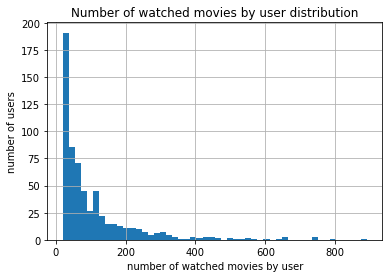

15     890
73     787
564    745
547    742
468    739
      ... 
618     20
319     20
399     20
1       20
167     20
Name: userId, Length: 625, dtype: int64

In [10]:
df_user_counts = df_rating.userId.value_counts().sort_values(ascending=False)
df_user_counts.hist(bins=50)
plt.title("Number of watched movies by user distribution")
plt.xlabel("number of watched movies by user")
plt.ylabel("number of users")
plt.show()

display(df_user_counts)

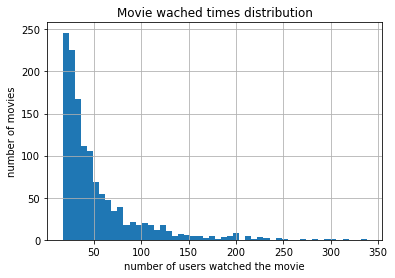

356     338
296     318
318     303
593     297
260     285
       ... 
262      18
3999     18
2720     18
1687     18
65       17
Name: movieId, Length: 1303, dtype: int64

In [11]:
df_movie_counts = df_rating.movieId.value_counts().sort_values(ascending=False)
df_movie_counts.hist(bins=50)
plt.title("Movie wached times distribution")
plt.xlabel("number of users watched the movie")
plt.ylabel("number of movies")
plt.show()

display(df_movie_counts)

#### merge `df_rating` and `df_movies` using `imdb_id` vs `movieId` connection stored in `df_links` 

In [12]:
df_rating = df_rating.join(df_links.set_index("movieId").imdbId, on="movieId")
df_rating.head(3)

,userId,movieId,rating,timestamp,imdbId
0,1,31,2.5,1260759144,112792
1,1,1029,3.0,1260759179,33563
2,1,1061,3.0,1260759182,117665


In [13]:
df_movies = df_movies[df_movies.imdb_id.notna()]
df_movies["imdb_id_int"] = df_movies.imdb_id.str[2:]
df_movies = df_movies[df_movies.imdb_id_int != ""]
df_movies.imdb_id_int = df_movies.imdb_id_int.astype(int)
df_movies = df_movies.drop_duplicates("imdb_id_int")
df_movies = df_movies.set_index("imdb_id_int")
df_movies = df_movies[df_movies.index.isin(df_rating.imdbId.unique())]
df_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
imdb_id_int,,,,,,,,,,,,,,,,,,,,,
114709,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
113497,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [14]:
df_rating.join(df_movies, on="imdbId").head(2)

,userId,movieId,rating,timestamp,imdbId,adult,belongs_to_collection,budget,genres,homepage,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,31,2.5,1260759144,112792,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,...,1995-08-11,180000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,She broke the rules... and changed their lives.,Dangerous Minds,False,6.4,249.0
1,1,1029,3.0,1260759179,33563,False,NaN,812000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,...,1941-10-22,1600000.0,64.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The One...The Only...The FABULOUS...,Dumbo,False,6.8,1206.0


# memory based

## user-user

In [15]:
df_rating.head()

,userId,movieId,rating,timestamp,imdbId
0,1,31,2.5,1260759144,112792
1,1,1029,3.0,1260759179,33563
2,1,1061,3.0,1260759182,117665
3,1,1129,2.0,1260759185,82340
4,1,1172,4.0,1260759205,95765


In [96]:
df_rating['movieId'].unique()

array([  31, 1029, 1061, ..., 1894, 2375, 2567], dtype=int64)

In [98]:
df_rating[df_rating['movieId'] == 80463]

,userId,movieId,rating,timestamp,imdbId
2357,15,80463,2.0,1361078260,1285016
7331,46,80463,5.0,1366393535,1285016
7759,48,80463,4.5,1305604694,1285016
8650,56,80463,4.0,1467004187,1285016
11578,73,80463,4.5,1295875330,1285016
12863,81,80463,3.0,1307172215,1285016
20572,138,80463,3.5,1440379410,1285016
21375,149,80463,4.0,1436921703,1285016
22122,152,80463,3.5,1335947732,1285016
22582,157,80463,4.5,1323549222,1285016


In [16]:
utility_matrix = df_rating.pivot(index='userId', columns='movieId', values='rating')

In [17]:
utility_matrix.head()

movieId,1,2,3,5,6,7,9,10,11,14,...,112552,112556,112852,115617,115713,116797,122882,122886,134130,134853
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
corr_rating = utility_matrix.T.corr()

In [19]:
corr_rating.head()

userId,1,2,3,4,5,6,7,8,9,10,...,660,661,662,664,665,666,667,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.068752,NaN,NaN,-0.912871,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,0.132453,NaN,NaN,NaN,NaN,NaN
2,NaN,1.000000,0.000000,-0.070244,0.283473,NaN,0.302032,-0.044901,0.000000,-1.000000,...,0.500000,NaN,-0.042903,0.296117,-0.382495,0.052083,-0.224189,-1.000000,-0.648204,0.460239
3,NaN,0.000000,1.000000,NaN,-0.170881,-1.000000,0.188056,0.061023,-0.580948,0.559017,...,-0.183126,0.327327,0.143420,0.506024,0.044607,0.655596,0.699260,0.970725,-0.218218,0.354044
4,0.068752,-0.070244,NaN,1.000000,0.084827,0.434057,0.270274,0.471954,NaN,NaN,...,NaN,NaN,0.179664,0.187556,0.347722,0.254491,0.600736,-0.070014,0.027639,0.131904
5,NaN,0.283473,-0.170881,0.084827,1.000000,0.333333,-0.559017,-0.181601,0.261116,1.000000,...,1.000000,NaN,0.389156,0.002655,0.180346,-0.369175,-0.408248,NaN,-0.632456,-0.186872


In [20]:
corr_rating.shape

(625, 625)

In [43]:
user_id = 88
k = 10

In [51]:
knn_users = corr_rating.loc[user_id].drop(labels=[user_id]).sort_values(ascending=False)[:k].index

In [52]:
knn_users

Int64Index([229, 54, 482, 601, 123, 322, 411, 571, 331, 58], dtype='int64', name='userId')

In [81]:
top_n_films = 30

In [82]:
top_films = utility_matrix.loc[knn_users].mean().sort_values(ascending=False)[:top_n_films].index

In [83]:
top_films.values.sort()
top_films

Int64Index([   18,   288,   785,   903,   924,   969,  1035,  1086,  1088,
             1278,  1287,  1617,  1997,  2005,  2137,  2428,  2467,  2502,
             2716,  2788,  2791,  2792,  2841,  3005,  3409,  3421,  3555,
             3826,  5991, 80463],
           dtype='int64', name='movieId')

## item-item

In [56]:
top_item_id = utility_matrix.loc[user_id].sort_values(ascending=False).index[0]

In [57]:
corr_items = utility_matrix.corr()

In [58]:
watched_films = utility_matrix.loc[user_id].sort_values(ascending=False).dropna().index

In [84]:
knn_items = corr_items.loc[top_item_id].drop(labels=watched_films).sort_values(ascending=False)[:top_n_films].index

In [85]:
knn_items.values.sort()
knn_items

Int64Index([    88,    145,    374,    475,   1566,   1680,   2471,   2688,
              3178,   3196,   3301,   3555,   4007,   4023,   4054,   4148,
              4299,   4643,   4865,   5064,   5971,   8957,  31658,  45186,
             53996,  69757,  74789,  81562, 111759, 115617],
           dtype='int64', name='movieId')

## 3. Content based recomendation system:

#### parse and build categorical features: `genres`, `production_countries`, `spoken_languages`, `production_companies`


In [99]:
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
imdb_id_int,,,,,,,,,,,,,,,,,,,,,
114709,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
113497,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
113228,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
113041,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
113277,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0


In [100]:
df_movies.genres.iloc[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [101]:
from collections.abc import Iterable

def parse_key(s, key):
    if not s or str(s) == "nan" or not isinstance(eval(str(s)), Iterable):
        return []
    else:
        return [value.get(key).replace(" ", "_") for value in eval(str(s))]

print("before :", df_movies.genres.iloc[0])
print("after :", parse_key(df_movies.genres.iloc[0], key="name"))

before : [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
after : ['Animation', 'Comedy', 'Family']


In [102]:
df_movies.genres.apply(parse_key, key="name")

imdb_id_int
114709                        [Animation, Comedy, Family]
113497                       [Adventure, Fantasy, Family]
113228                                  [Romance, Comedy]
113041                                           [Comedy]
113277                   [Action, Crime, Drama, Thriller]
                                ...                      
1392190    [Action, Adventure, Science_Fiction, Thriller]
2488496     [Action, Adventure, Science_Fiction, Fantasy]
3659388               [Drama, Adventure, Science_Fiction]
2096673                [Drama, Comedy, Animation, Family]
185906                               [Action, Drama, War]
Name: genres, Length: 1301, dtype: object

In [103]:
df_movies.genres = df_movies.genres.apply(parse_key, key="name")
df_movies.production_countries = df_movies.production_countries.apply(parse_key, key="iso_3166_1")
df_movies.spoken_languages = df_movies.spoken_languages.apply(parse_key, key="iso_639_1")
df_movies.production_companies = df_movies.production_companies.apply(parse_key, key="name")

df_movies[["genres", "production_countries", "spoken_languages", "production_companies"]].head(3)

,genres,production_countries,spoken_languages,production_companies
imdb_id_int,,,,
114709,"[Animation, Comedy, Family]",[US],[en],[Pixar_Animation_Studios]
113497,"[Adventure, Fantasy, Family]",[US],"[en, fr]","[TriStar_Pictures, Teitler_Film, Interscope_Co..."
113228,"[Romance, Comedy]",[US],[en],"[Warner_Bros., Lancaster_Gate]"


In [104]:
from collections import Counter

def get_top_k_most_frequent_values(df_movies, key, k=20):

    ls = []
    for values in df_movies[key]:
        ls += values

    top_k = Counter(ls).most_common(k)
    share = sum([counts for _, counts in top_k])/len(ls)

    print("\n======================")
    print(f"> TOP {key} < #unique: {len(np.unique(ls))}")
    print("----------------------")
    print(f"share from all: {share*100:.2f}%")
    print("----------------------")
    print("\n".join([str(s) for s in top_k]))
    print("======================\n")

    return [values for values, _ in top_k]

top_genres = get_top_k_most_frequent_values(df_movies, key="genres", k=20)
top_production_countries = get_top_k_most_frequent_values(df_movies, key="production_countries", k=20)
top_spoken_languages = get_top_k_most_frequent_values(df_movies, key="spoken_languages", k=20)
top_production_companies = get_top_k_most_frequent_values(df_movies, key="production_companies", k=20)


> TOP genres < #unique: 18
----------------------
share from all: 100.00%
----------------------
('Drama', 628)
('Comedy', 482)
('Thriller', 340)
('Action', 323)
('Adventure', 296)
('Romance', 246)
('Crime', 232)
('Science_Fiction', 196)
('Fantasy', 170)
('Family', 154)
('Mystery', 128)
('Animation', 83)
('Horror', 77)
('Music', 58)
('History', 50)
('War', 49)
('Western', 19)
('Documentary', 6)


> TOP production_countries < #unique: 37
----------------------
share from all: 98.31%
----------------------
('US', 1194)
('GB', 193)
('DE', 78)
('FR', 56)
('CA', 29)
('AU', 23)
('IT', 22)
('JP', 22)
('NZ', 13)
('CN', 8)
('IE', 7)
('MX', 7)
('ES', 6)
('HK', 5)
('CZ', 5)
('PL', 4)
('TW', 3)
('PE', 3)
('IN', 3)
('IS', 3)


> TOP spoken_languages < #unique: 62
----------------------
share from all: 95.24%
----------------------
('en', 1261)
('fr', 144)
('es', 106)
('de', 93)
('it', 74)
('ru', 61)
('ja', 36)
('zh', 29)
('la', 25)
('ar', 23)
('cn', 21)
('hu', 15)
('pt', 15)
('cs', 10)
('el', 9)
(

In [105]:
key = "genre"

top_ls = ['Animation', 'Drama','Comedy','Thriller','Romance','Action','Crime', 'Adventure',
          'Horror','Science_Fiction','Family','Fantasy','Mystery','Documentary',
          'Music','Animation','History','War','Western','Foreign','TV_Movie']

record = ['Animation', 'Comedy', 'Family']

{f"is_{key}_{top_value}": int(top_value in record) for top_value in top_ls}

{'is_genre_Animation': 1,
 'is_genre_Drama': 0,
 'is_genre_Comedy': 1,
 'is_genre_Thriller': 0,
 'is_genre_Romance': 0,
 'is_genre_Action': 0,
 'is_genre_Crime': 0,
 'is_genre_Adventure': 0,
 'is_genre_Horror': 0,
 'is_genre_Science_Fiction': 0,
 'is_genre_Family': 1,
 'is_genre_Fantasy': 0,
 'is_genre_Mystery': 0,
 'is_genre_Documentary': 0,
 'is_genre_Music': 0,
 'is_genre_History': 0,
 'is_genre_War': 0,
 'is_genre_Western': 0,
 'is_genre_Foreign': 0,
 'is_genre_TV_Movie': 0}

In [106]:
def get_one_hot_encoding_features(record, key, top_ls):
    return pd.Series({f"is_{key}_{top_value}": int(top_value in record) for top_value in top_ls})

df_ohe_features_genres = df_movies.genres.apply(get_one_hot_encoding_features, key="genres", top_ls=top_genres)
df_ohe_features_production_countries = df_movies.genres.apply(get_one_hot_encoding_features, key="production_countries", top_ls=top_production_countries)
df_ohe_features_spoken_languages = df_movies.genres.apply(get_one_hot_encoding_features, key="spoken_languages", top_ls=top_spoken_languages)
df_ohe_features_production_companies = df_movies.genres.apply(get_one_hot_encoding_features, key="production_companies", top_ls=top_production_companies)

df_ohe_features_genres.head(3)

,is_genres_Drama,is_genres_Comedy,is_genres_Thriller,is_genres_Action,is_genres_Adventure,is_genres_Romance,is_genres_Crime,is_genres_Science_Fiction,is_genres_Fantasy,is_genres_Family,is_genres_Mystery,is_genres_Animation,is_genres_Horror,is_genres_Music,is_genres_History,is_genres_War,is_genres_Western,is_genres_Documentary
imdb_id_int,,,,,,,,,,,,,,,,,,
114709,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
113497,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
113228,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### feature preparation

In [107]:
df_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
imdb_id_int,,,,,,,,,,,,,,,,,,,,,
114709,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,[en],Released,NaN,Toy Story,False,7.7,5415.0
113497,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[en, fr]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [108]:
FEATURE_LS = [
    "budget",
    "popularity",
    "release_date",
    "revenue",
    "runtime",
    "vote_average",
    "vote_count",

    "original_language",
    "genres",
    "production_countries",
    "spoken_languages"

]

print(df_movies[FEATURE_LS].dtypes)

df_movies[FEATURE_LS].head(2)


budget                   object
popularity               object
release_date             object
revenue                 float64
runtime                 float64
vote_average            float64
vote_count              float64
original_language        object
genres                   object
production_countries     object
spoken_languages         object
dtype: object


,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,original_language,genres,production_countries,spoken_languages
imdb_id_int,,,,,,,,,,,
114709,30000000,21.9469,1995-10-30,373554033.0,81.0,7.7,5415.0,en,"[Animation, Comedy, Family]",[US],[en]
113497,65000000,17.0155,1995-12-15,262797249.0,104.0,6.9,2413.0,en,"[Adventure, Fantasy, Family]",[US],"[en, fr]"


In [109]:
df_movies.budget

imdb_id_int
114709      30000000
113497      65000000
113228             0
113041             0
113277      60000000
             ...    
1392190    150000000
2488496    245000000
3659388    108000000
2096673    175000000
185906     125000000
Name: budget, Length: 1301, dtype: object

In [110]:
NUMERICAL_FEATURE_LS = [
    "date_rating_timestamp",

    "budget",
    "popularity",
    "revenue",
    "runtime",
    "vote_average",
    "vote_count",

    "release_date_timestamp",

]

CATEGORICAL_FEATURE_LS = [
    "userId",
    "original_language",
]

FEATURE_LS = NUMERICAL_FEATURE_LS + CATEGORICAL_FEATURE_LS
FEATURE_LS += list(df_ohe_features_genres.columns)
FEATURE_LS += list(df_ohe_features_production_countries.columns)
FEATURE_LS += list(df_ohe_features_spoken_languages.columns)



df_movies.budget = df_movies.budget.astype(int).replace(0, np.NaN)
df_movies.budget = df_movies.budget.fillna(df_movies.budget.mean())

df_movies.popularity = df_movies.popularity.astype(float)

df_movies["release_date_timestamp"] = df_movies.release_date.astype(np.datetime64)
df_movies["release_date_timestamp"] = df_movies["release_date_timestamp"].apply(lambda x: x.timestamp() if x is not pd.NaT else np.NaN)

df_movies.original_language = df_movies.original_language.astype(str)


df = df_rating.join(df_movies, on="imdbId")
df = df.rename(columns={"timestamp": "date_rating_timestamp"})

df = df.join(df_ohe_features_genres, on="imdbId")
df = df.join(df_ohe_features_production_countries, on="imdbId")
df = df.join(df_ohe_features_spoken_languages, on="imdbId")

df = df.dropna(subset=FEATURE_LS)

display(df[FEATURE_LS].head(2))

df[FEATURE_LS].info()


,date_rating_timestamp,budget,popularity,revenue,runtime,vote_average,vote_count,release_date_timestamp,userId,original_language,...,is_spoken_languages_cn,is_spoken_languages_hu,is_spoken_languages_pt,is_spoken_languages_cs,is_spoken_languages_el,is_spoken_languages_ko,is_spoken_languages_pl,is_spoken_languages_he,is_spoken_languages_sv,is_spoken_languages_vi
0,1260759144,4.265788e+07,9.481338,180000000.0,99.0,6.4,249.0,808099200.0,1,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1260759179,8.120000e+05,14.655879,1600000.0,64.0,6.8,1206.0,-889747200.0,1,en,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68327 entries, 0 to 100003
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date_rating_timestamp       68327 non-null  int64  
 1   budget                      68327 non-null  float64
 2   popularity                  68327 non-null  float64
 3   revenue                     68327 non-null  float64
 4   runtime                     68327 non-null  float64
 5   vote_average                68327 non-null  float64
 6   vote_count                  68327 non-null  float64
 7   release_date_timestamp      68327 non-null  float64
 8   userId                      68327 non-null  int64  
 9   original_language           68327 non-null  object 
 10  is_genres_Drama             68327 non-null  float64
 11  is_genres_Comedy            68327 non-null  float64
 12  is_genres_Thriller          68327 non-null  float64
 13  is_genres_Action            68

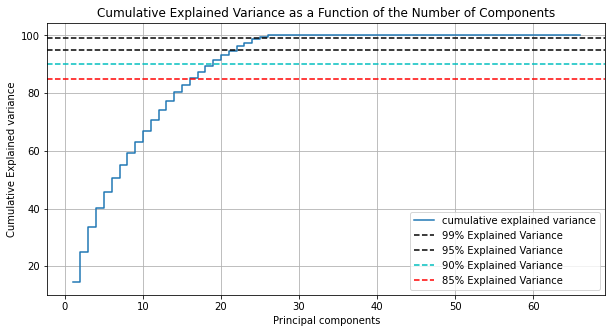

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA()

principal_components = pca.fit_transform(scaler.fit_transform(df[FEATURE_LS].drop(columns=["userId","original_language"])))
pca.fit_transform(scaler.fit_transform(df[FEATURE_LS].drop(columns=["userId","original_language"])))

df_pca = pd.DataFrame(
        data=principal_components, 
        columns=[f'pc-{k}' for k in range(1, pca.n_components_+1)], index = df[FEATURE_LS].index)
    
cum_var_exp = pca.explained_variance_ratio_.cumsum()*100

plt.figure(figsize=(10, 5))
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='post',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 99, color='k', linestyle='--', label = '99% Explained Variance')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.grid()
plt.show()


In [112]:
df_pca.iloc[:, :10]

,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,pc-10
0,-1.046387,0.670668,-0.395178,-0.628227,-1.052011,0.968607,0.882895,0.535469,-0.284274,-0.312905
1,-1.826978,-3.120780,1.497770,-1.741572,3.564333,1.090995,0.112105,0.567066,-0.510527,-0.594806
2,-0.244109,2.129328,-0.291297,-1.202928,-0.734602,1.259690,0.828471,0.067477,-0.285017,-0.068150
3,-0.136445,-0.148586,-1.596492,0.508443,1.402169,-1.394319,0.043938,0.760174,-0.858405,-0.157734
4,-1.141169,0.916661,1.483722,-0.054261,-0.857302,-0.978164,-0.344528,-0.665801,0.293341,0.290577
...,...,...,...,...,...,...,...,...,...,...
99996,-0.842378,0.107938,-0.175766,-0.060289,-1.136017,0.474270,1.122839,-1.293250,-2.940857,1.230004
99997,-0.189137,2.325721,2.406577,1.866990,0.250457,0.739318,-0.831597,0.745408,-0.514396,-0.659485
100001,4.118745,-0.071515,-2.425586,1.116985,0.120691,0.031806,-0.145307,-0.593849,-0.462870,0.409696
100002,-1.358834,-0.731910,0.786528,-0.343095,0.190910,1.092437,-0.008497,0.185574,0.329359,-0.110191


#### model traning

In [122]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image

In [123]:
user_id = 88

In [130]:
labelencoder = LabelEncoder()
df[['original_language']] = labelencoder.fit_transform(df[['original_language']])

C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [131]:
FEATURE_LS.remove('userId')

ValueError: list.remove(x): x not in list

In [132]:
y = df[['rating']][df['userId'] == user_id]
y.head()


,rating
13512,3.5
13513,4.0
13514,3.5
13515,3.5
13516,3.0


In [153]:
y.rating = y.rating.astype(int)

In [155]:
y.head()

,rating
13512,3
13513,4
13514,3
13515,3
13516,3


In [133]:
X = df[FEATURE_LS][df['userId'] == user_id]

X.head()

,date_rating_timestamp,budget,popularity,revenue,runtime,vote_average,vote_count,release_date_timestamp,original_language,is_genres_Drama,...,is_spoken_languages_cn,is_spoken_languages_hu,is_spoken_languages_pt,is_spoken_languages_cs,is_spoken_languages_el,is_spoken_languages_ko,is_spoken_languages_pl,is_spoken_languages_he,is_spoken_languages_sv,is_spoken_languages_vi
13512,1239773232,6.500000e+07,17.015539,262797249.0,104.0,6.9,2413.0,818985600.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13513,1239765126,5.800000e+07,6.677277,0.0,127.0,6.2,141.0,818985600.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13514,1239764623,6.200000e+07,6.318445,107879496.0,106.0,6.5,199.0,816566400.0,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13515,1239764334,3.025000e+07,12.669608,115101622.0,105.0,6.4,305.0,814147200.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13516,1239755559,4.265788e+07,9.481338,180000000.0,99.0,6.4,249.0,808099200.0,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [137]:
'''
scaler = StandardScaler()
X[['date_rating_timestamp', 'budget', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'release_date_timestamp',
       'original_language']] = StandardScaler().fit_transform(X[['date_rating_timestamp', 'budget', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'release_date_timestamp',
       'original_language']])
'''

"\nscaler = StandardScaler()\nX[['date_rating_timestamp', 'budget', 'popularity', 'revenue', 'runtime',\n       'vote_average', 'vote_count', 'release_date_timestamp',\n       'original_language']] = StandardScaler().fit_transform(X[['date_rating_timestamp', 'budget', 'popularity', 'revenue', 'runtime',\n       'vote_average', 'vote_count', 'release_date_timestamp',\n       'original_language']])\n"

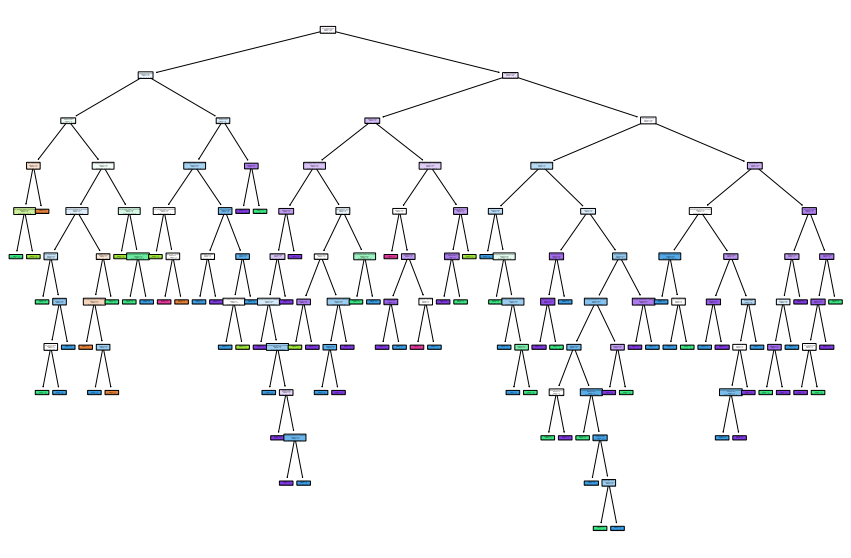

In [157]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True, rounded=True,
               feature_names=X.columns.tolist(), proportion=False)
plt.show()

In [158]:
watched_movies = df[FEATURE_LS][df['userId'] == user_id].index
watched_movies

Int64Index([13512, 13513, 13514, 13515, 13516, 13517, 13518, 13519, 13520,
            13521,
            ...
            13746, 13749, 13750, 13751, 13752, 13753, 13754, 13755, 13764,
            13765],
           dtype='int64', length=236)

In [159]:
unwatched_movies = df[FEATURE_LS][~df.index.isin(watched_movies)]
unwatched_movies.head()

,date_rating_timestamp,budget,popularity,revenue,runtime,vote_average,vote_count,release_date_timestamp,original_language,is_genres_Drama,...,is_spoken_languages_cn,is_spoken_languages_hu,is_spoken_languages_pt,is_spoken_languages_cs,is_spoken_languages_el,is_spoken_languages_ko,is_spoken_languages_pl,is_spoken_languages_he,is_spoken_languages_sv,is_spoken_languages_vi
0,1260759144,4.265788e+07,9.481338,180000000.0,99.0,6.4,249.0,808099200.0,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1260759179,8.120000e+05,14.655879,1600000.0,64.0,6.8,1206.0,-889747200.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1260759182,4.400000e+07,9.198283,165615285.0,147.0,7.3,729.0,845596800.0,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1260759185,6.000000e+06,10.124544,50244700.0,99.0,6.9,720.0,359337600.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1260759205,4.265788e+07,14.177005,11990401.0,124.0,8.2,834.0,595728000.0,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
y_pred = pd.DataFrame(model.predict(unwatched_movies), columns = ['y_pred'], index = unwatched_movies.index)


In [161]:
y_pred

,y_pred
0,2
1,1
2,4
3,3
4,4
...,...
99996,2
99997,4
100001,2
100002,3


In [162]:
list_movies = pd.concat([unwatched_movies, y_pred], axis=1)

In [163]:
list_check = list_movies[list_movies.y_pred == 5].index
list_check

Int64Index([   21,    77,   180,   187,   239,   252,   256,   257,   259,
              262,
            ...
            99786, 99793, 99877, 99908, 99925, 99929, 99932, 99963, 99965,
            99981],
           dtype='int64', length=2032)

In [164]:
top_movies = df['movieId'][list_check].tolist()

In [165]:
set(top_movies)

{17,
 509,
 597,
 858,
 920,
 1020,
 1022,
 1035,
 1059,
 1088,
 1234,
 1246,
 1266,
 1271,
 1287,
 1380,
 1407,
 1641,
 1704,
 1954,
 1962,
 1994,
 1997,
 2000,
 2003,
 2018,
 2657,
 2739,
 2947,
 3363,
 3421,
 3448,
 3671,
 4008,
 4085,
 4973,
 6711,
 8622,
 39183,
 56367,
 63082}

In [209]:
!pip install xgboost

In [166]:
import xgboost as xgb

In [167]:
XGBoost = xgb.XGBClassifier(
        objective='binary:logistic',
        learning_rate =0.01,
         max_depth=3,
        scale_pos_weight = 1,
        n_estimators=40
    )

XGBoost.fit(X, y)

predictions = XGBoost.predict(unwatched_movies)
y_pred = pd.DataFrame(predictions, columns = ['y_pred_xgboost'], index = unwatched_movies.index)


C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\home\Anaconda3\envs\Test_help\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [168]:
y_pred.value_counts()

y_pred_xgboost
4                 35139
3                 22382
2                  4593
0                  4285
5                  1391
1                   301
dtype: int64

In [169]:
list_movies = pd.concat([unwatched_movies, y_pred], axis=1)

In [170]:
list_check = list_movies[list_movies.y_pred_xgboost == 5].index
list_check

Int64Index([   58,    77,   139,   160,   180,   239,   240,   333,   370,
              374,
            ...
            99720, 99773, 99786, 99877, 99897, 99908, 99911, 99927, 99932,
            99981],
           dtype='int64', length=1391)

In [171]:
top_movies = df['movieId'][list_check].tolist()

In [172]:
set(top_movies)

{357,
 509,
 858,
 1035,
 1088,
 1090,
 1234,
 1380,
 1387,
 1704,
 1962,
 1997,
 2991,
 3984,
 4973,
 8622,
 56367}